In [20]:
# DATASETS
# https://ourworldindata.org/military-personnel-spending
# https://ourworldindata.org/financing-education

# IMPORT LIBRARIES
import pandas as pd 
import matplotlib.pyplot as plt 

In [21]:
# MAKE DATAFRAMES
military = pd.read_csv('./military-expenditure-share-gdp.csv')
education = pd.read_csv('./total-government-expenditure-on-education-gdp.csv')

In [22]:
military.head(3)

,Entity,Code,Year,military_expenditure_share_gdp
0,Afghanistan,AFG,1970,1.63
1,Afghanistan,AFG,1973,1.87
2,Afghanistan,AFG,1974,1.61


In [23]:
education.columns

Index(['Entity', 'Code', 'Year',
       'Historical and more recent expenditure estimates'],
      dtype='object')

In [24]:
# SEE DIFFERENCE IN ENTITIES 
mCountries = sorted(military['Entity'].unique())
eCountries = sorted(education['Entity'].unique())
list(set(eCountries) - set(mCountries))

['South Asia (WB)',
 'Macao',
 'Sao Tome and Principe',
 'American Samoa',
 'Marshall Islands',
 'Latin America and Caribbean (WB)',
 'East Asia and the Pacific (WB)',
 'Aruba',
 'Tuvalu',
 'Palau',
 'Iceland',
 'Hong Kong',
 'North America (WB)',
 'Nauru',
 'Bahamas',
 'Saint Vincent and the Grenadines',
 'Cayman Islands',
 'Antigua and Barbuda',
 'Curacao',
 'Bermuda',
 'EU (27)',
 'Low-income countries',
 'Puerto Rico',
 'World',
 'Samoa',
 'Maldives',
 'Dominica',
 'Saint Lucia',
 'Grenada',
 'Saint Kitts and Nevis',
 'Bhutan',
 'Upper-middle-income countries',
 'Southern and Eastern Africa (WB)',
 'Comoros',
 'Vanuatu',
 'Suriname',
 'San Marino',
 'Western and Central Africa (WB)',
 'Tonga',
 'British Virgin Islands',
 'Barbados',
 'Micronesia (country)',
 'Europe and Central Asia (WB)',
 'Solomon Islands',
 'Middle East and North Africa (WB)',
 'Central Europe and the Baltics (WB)',
 'Kiribati',
 'High-income countries',
 'Andorra',
 'Arab World (WB)',
 'Liechtenstein',
 'Sub-Sa

In [25]:
# MERGE DATASETS BY COLUMN NAME
merged = pd.merge(education, military, on = ["Code", "Year"], how = "outer").fillna(0)

In [26]:
# CONVERT MERGED DATASET TO CSV
merged.to_csv("merged.csv", index=False)
merged.tail(3)

,Entity_x,Code,Year,Historical and more recent expenditure estimates,Entity_y,military_expenditure_share_gdp
8967,0,ZWE,2015,0.0,Zimbabwe,1.89
8968,0,ZWE,2016,0.0,Zimbabwe,1.74
8969,0,ZWE,2019,0.0,Zimbabwe,0.70


In [27]:
for d in merged["Entity_x"] :
    print(d)

Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Albania
Algeria
Algeria
Algeria
Algeria
Algeria
Algeria
Algeria
Algeria
Algeria
Algeria
Algeria
Algeria
Algeria
American Samoa
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Andorra
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Angola
Antigua and Barbuda
Antigua and Barbuda
Antigua and Barbuda
Antigua and Barbuda
Antigua and Barbuda
Antigua an

In [28]:
# FIX EMPTY ENTITIES
list_eX = list(merged['Entity_x'])

for index, eX in enumerate(list_eX) :
    eY = merged.at[index,'Entity_y']
    if eX == 0 :
        merged.at[index,'Entity_x'] = merged.at[index,'Entity_y']
    if eY == 0 :
        merged.at[index,'Entity_y'] = merged.at[index,'Entity_x']
merged.tail(3)

,Entity_x,Code,Year,Historical and more recent expenditure estimates,Entity_y,military_expenditure_share_gdp
8967,Zimbabwe,ZWE,2015,0.0,Zimbabwe,1.89
8968,Zimbabwe,ZWE,2016,0.0,Zimbabwe,1.74
8969,Zimbabwe,ZWE,2019,0.0,Zimbabwe,0.70


In [29]:
# DROP / RENAME COLUMNS
merged = merged.drop('Entity_y', axis=1)
merged.rename(columns = {'Entity_x':'Entity'}, inplace = True) 
merged.head(3)

,Entity,Code,Year,Historical and more recent expenditure estimates,military_expenditure_share_gdp
0,Afghanistan,AFG,1971,1.16036,0.00
1,Afghanistan,AFG,1972,1.11718,0.00
2,Afghanistan,AFG,1973,1.42788,1.87


In [30]:
merged.tail(3)

,Entity,Code,Year,Historical and more recent expenditure estimates,military_expenditure_share_gdp
8967,Zimbabwe,ZWE,2015,0.0,1.89
8968,Zimbabwe,ZWE,2016,0.0,1.74
8969,Zimbabwe,ZWE,2019,0.0,0.70


In [31]:
# FILTER DATASET
filteredUS = merged[merged['Entity'] == 'United States'].reset_index(drop=True)
filteredUS = filteredUS.sort_values('Year')
filteredUS.head(3)

,Entity,Code,Year,Historical and more recent expenditure estimates,military_expenditure_share_gdp
23,United States,USA,1949,0.0,5.27
24,United States,USA,1950,0.0,5.08
25,United States,USA,1951,0.0,10.17


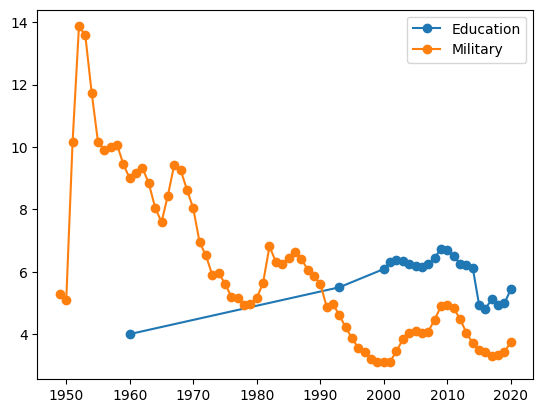

In [32]:
# COMPARE SPENDING
filteredUS_E = filteredUS[filteredUS['Historical and more recent expenditure estimates'] != 0].reset_index(drop=True)
filteredUS_M = filteredUS[filteredUS['military_expenditure_share_gdp'] != 0].reset_index(drop=True)
plt.plot(filteredUS_E["Year"], filteredUS_E['Historical and more recent expenditure estimates'], marker = 'o')
plt.plot(filteredUS_M["Year"], filteredUS_M['military_expenditure_share_gdp'], marker = 'o')
labels = ["Education", "Military"]
plt.legend(labels)
plt.show()

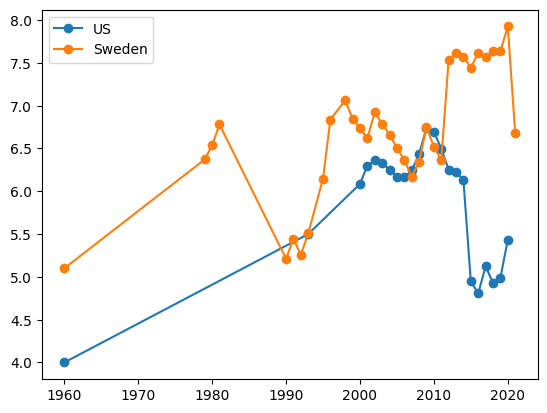

In [33]:
# COMPARE COUNTRIES
filteredSweden_E = merged[(merged['Entity'] == 'Sweden') & (merged['Historical and more recent expenditure estimates'] != 0)].reset_index(drop=True).sort_values('Year')

plt.plot(filteredUS_E["Year"], filteredUS_E["Historical and more recent expenditure estimates"], marker='o')
plt.plot(filteredSweden_E["Year"], filteredSweden_E["Historical and more recent expenditure estimates"], marker='o')
labels = ["US", "Sweden"]
plt.legend(labels)
plt.show()